In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
# utility functions
def create_uniform_dist(l, h, n=500):
    uniform = np.random.uniform(l, h, (n, 2))
    return uniform

def create_gaussian_dist(mu, std, n=500):
    gaussian = np.random.normal(mu, std, (n, 2))
    return gaussian

# Analysis of SKLearn Perceptron

### Influence of Size of Input Vector on Training and Classification of Network

In [29]:
# Three Examples
uniform_n_data_points = 500
u_x_a = create_uniform_dist(.5, 1.5, uniform_n_data_points)
u_y_a = [ 'A' for _ in range(uniform_n_data_points) ]
u_x_b = create_uniform_dist(1.5, 2.5, uniform_n_data_points)
u_y_b = [ 'B' for _ in range(uniform_n_data_points) ]

u_x0_a, u_x1_a = u_x_a.T
u_x0_b, u_x1_b = u_x_b.T

fig = plt.figure()
ax = fig.subplots(1)

ax.scatter(u_x0_a, u_x1_a, color='red', marker='x')
ax.scatter(u_x0_b, u_x1_b, color='blue', marker='^')
ax.set(title='Uniform Distribution for Two Classes', xlabel='Feature 1', ylabel='Feature 2')
ax.legend(['Class A', 'Class B'])

#plt.show()
plt.savefig('uniform_distribution_two_classes.png', bbox_inches='tight')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [32]:
def line_func(bias, w0, w1, x):
    return (-w0 * x - bias) / w1

In [81]:
# Create Perceptron for above distribution
uniform_perceptron = Perceptron(verbose=1, random_state=0)
u_x = [*u_x_a, *u_x_b]
u_y = u_y_a + u_y_b

uniform_lines = []
uniform_lines_x = np.linspace(.5, 2.5)
training_sizes = [.25, .5, .75]
for i in training_sizes:
    print(f'######################### {i} of total set :: {int(i * 1000)} / 1000 #########################')
    u_x_train, u_x_test, u_y_train, u_y_test = train_test_split(u_x, u_y, random_state=0, train_size=i)
    uniform_perceptron.fit(u_x_train, u_y_train)

    uniform_lines.append(line_func(uniform_perceptron.intercept_, uniform_perceptron.coef_[0][0], uniform_perceptron.coef_[0][1], uniform_lines_x))

    # Perceptron Information
    print(f'Number of Epochs before Convergence: {uniform_perceptron.n_iter_}')
    uniform_perc_train_accuracy = accuracy_score(uniform_perceptron.predict(u_x_train), u_y_train)
    uniform_perc_test_accuracy = accuracy_score(uniform_perceptron.predict(u_x_test), u_y_test)
    uniform_perc_total_accuracy = accuracy_score(uniform_perceptron.predict([*u_x_train, *u_x_test]), [*u_y_train, *u_y_test])
    print(f'Perceptron Accuracy on Training Data: {uniform_perc_train_accuracy}')
    print(f'Perceptron Accuracy on Test Data: {uniform_perc_test_accuracy}')
    print(f'Perceptron Accuracy on All Data: {uniform_perc_total_accuracy}')

######################### 0.25 of total set :: 250 / 1000 #########################
-- Epoch 1
Norm: 3.52, NNZs: 2, Bias: -7.000000, T: 250, Avg. loss: 0.241422
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.52, NNZs: 2, Bias: -7.000000, T: 500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.52, NNZs: 2, Bias: -7.000000, T: 750, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.52, NNZs: 2, Bias: -7.000000, T: 1000, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.52, NNZs: 2, Bias: -7.000000, T: 1250, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.52, NNZs: 2, Bias: -7.000000, T: 1500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3.52, NNZs: 2, Bias: -7.000000, T: 1750, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds
Number of Epochs before Convergence: 7
Perceptron Accuracy on Training Data: 1.0
Pe

In [42]:
fig = plt.figure()
(ax0, ax1), (ax2, _) = fig.subplots(ncols=2, nrows=2)
fig.set_figheight(20)
fig.set_figwidth(20)

ax0.scatter(u_x0_a, u_x1_a, color='red', marker='x')
ax0.scatter(u_x0_b, u_x1_b, color='blue', marker='^')
ax0.plot(uniform_lines_x, uniform_lines[0], color='green')
ax0.set(title='Uniform Distribution for Two Classes 25% Training Data', xlabel='Feature 1', ylabel='Feature 2')
ax0.legend(['Classifier', 'Class A', 'Class B'])

ax1.scatter(u_x0_a, u_x1_a, color='red', marker='x')
ax1.scatter(u_x0_b, u_x1_b, color='blue', marker='^')
ax1.plot(uniform_lines_x, uniform_lines[1], color='green')
ax1.set(title='Uniform Distribution for Two Classes 50% Training Data', xlabel='Feature 1', ylabel='Feature 2')
ax1.legend(['Classifier', 'Class A', 'Class B'])

ax2.scatter(u_x0_a, u_x1_a, color='red', marker='x')
ax2.scatter(u_x0_b, u_x1_b, color='blue', marker='^')
ax2.plot(uniform_lines_x, uniform_lines[2], color='green')
ax2.set(title='Uniform Distribution for Two Classes 75% Training Data', xlabel='Feature 1', ylabel='Feature 2')
ax2.legend(['Classifier', 'Class A', 'Class B'])

#plt.show()
plt.savefig('uniform_three_perceptrons.png', bbox_inches='tight')
plt.clf()

<Figure size 1440x1440 with 0 Axes>

In [45]:
def run_uniform_n_perceptron_test(train_size, n, verbose=0):
    """
    Uses uniform distribution for training a perceptron using train_size tests
    :param train_size: number of data points to train with
    :param n: total size of the data
    :param verbose: 0 for false, 1 for true
    :return: accuracy as percentage
    """

    split_val = int(n / 2)
    x_a = create_uniform_dist(.5, 1.5, split_val)
    y_a = [ 'A' for _ in range(split_val) ]
    x_b = create_uniform_dist(1.5, 2.5, split_val)
    y_b = [ 'B' for _ in range(split_val) ]

    X = [*x_a, *x_b]
    y = y_a + y_b

    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=train_size)

    p = Perceptron(verbose=verbose)
    p.fit(x_train, y_train)

    accuracy = accuracy_score(p.predict(x_test), y_test)
    if verbose == 1:
        print(f'Training Size: {train_size:5} :: Test Size: {len(x_test):5} :: Accuracy: {accuracy:.8f}')
    return accuracy, p.n_iter_

In [46]:
def average_score_inc_n(tester, max_train_size=9900, total_data_points=10000, avg_iterations=10, verbose=0):
    scores = []
    avg_epochs = []
    train_sizes = [ x for x in range(100, max_train_size + 1, 100) ]
    train_sizes.insert(0, 10)

    for i in train_sizes:
        temp_score = 0
        temp_epochs = 0
        for _ in range(avg_iterations):
            score, epochs = tester(i, total_data_points, verbose=verbose)
            temp_score += score
            temp_epochs += epochs

        scores.append(temp_score / avg_iterations)
        avg_epochs.append(temp_epochs / avg_iterations)
    return train_sizes, scores, avg_epochs

In [47]:
train_sizes_uniform, scores_uniform, epochs_uniform = average_score_inc_n(run_uniform_n_perceptron_test)

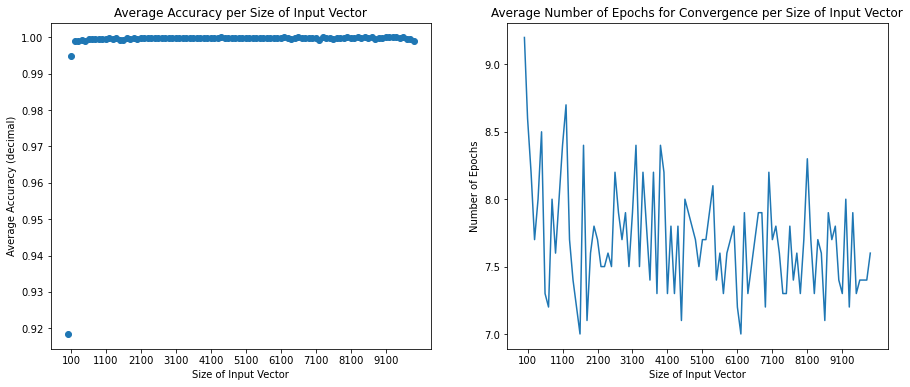

<Figure size 432x288 with 0 Axes>

In [58]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(15)
axp, axe = fig.subplots(1, 2)

# Checking Percentage of total set by Accuracy (10,000 data points)
train_percentages = [ x / 10000 for x in train_sizes_uniform ]
axp.scatter(train_sizes_uniform, scores_uniform)
axp.set(title='Average Accuracy per Size of Input Vector', ylabel='Average Accuracy (decimal)', xlabel='Size of Input Vector')
#axp.xaxis.set(ticks=np.arange(0, 1, .05))
axp.xaxis.set(ticks=range(100, 9901, 1000))
axe.plot(train_sizes_uniform, epochs_uniform)
axe.set(title='Average Number of Epochs for Convergence per Size of Input Vector', ylabel='Number of Epochs', xlabel='Size of Input Vector')
# axe.xaxis.set(ticks=np.arange(0, 1, .05))
axe.xaxis.set(ticks=range(100, 9901, 1000))
plt.show()
# plt.savefig('uniform_distribution_accuracy_and_epochs.png', bbox_inches='tight')
plt.clf()

### Influence of the Learning Rate on Total Number of Iterations required for Training

### Behavior of Network when Subjected to Non-Linearly Separable Classes

In [76]:
std = 1
gaussian_n_data_points = 500
g_x_a = create_gaussian_dist([-1, -1], std, gaussian_n_data_points)
g_y_a = [ 'A' for _ in range(gaussian_n_data_points)]
g_x_b = create_gaussian_dist([1, 1], std, gaussian_n_data_points)
g_y_b = [ 'B' for _ in range(gaussian_n_data_points)]

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = fig.subplots(1)

g_x0_a, g_x1_a = g_x_a.T
g_x0_b, g_x1_b = g_x_b.T

ax.scatter(g_x0_a, g_x1_a, color='red', marker='x')
ax.scatter(g_x0_b, g_x1_b, color='blue', marker='^')
ax.set(title='Gaussian Distribution for Two Classes', xlabel='Feature 1', ylabel='Feature 2')
ax.legend(['Class A', 'Class B'])

#plt.show()
plt.savefig('gaussian_dist_two_classes.png', bbox_inches='tight')
plt.clf()

<Figure size 720x720 with 0 Axes>

In [77]:
# Create Perceptron for above distribution
gaussian_perceptron = Perceptron(verbose=2, random_state=0)
g_x = [*g_x_a, *g_x_b]
g_y = g_y_a + g_y_b

g_x_train, g_x_test, g_y_train, g_y_test = train_test_split(g_x, g_y)
gaussian_perceptron.fit(g_x_train, g_y_train)

-- Epoch 1
Norm: 2.58, NNZs: 2, Bias: -1.000000, T: 750, Avg. loss: 0.148359
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.20, NNZs: 2, Bias: 0.000000, T: 1500, Avg. loss: 0.166038
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.77, NNZs: 2, Bias: 0.000000, T: 2250, Avg. loss: 0.163610
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.66, NNZs: 2, Bias: 0.000000, T: 3000, Avg. loss: 0.145357
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.77, NNZs: 2, Bias: -1.000000, T: 3750, Avg. loss: 0.168782
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.68, NNZs: 2, Bias: -1.000000, T: 4500, Avg. loss: 0.161051
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3.22, NNZs: 2, Bias: -1.000000, T: 5250, Avg. loss: 0.154206
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.85, NNZs: 2, Bias: 0.000000, T: 6000, Avg. loss: 0.175780
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.35, NNZs: 2, Bias: 2.000000, T: 6750, Avg. loss: 0.173902
Total training time: 0.0

Perceptron(verbose=2)

In [91]:
# Perceptron Information
print(f'Number of Epochs before Convergence: {gaussian_perceptron.n_iter_}')
gaussian_perc_train_accuracy = accuracy_score(gaussian_perceptron.predict(g_x_train), g_y_train)
gaussian_perc_test_accuracy = accuracy_score(gaussian_perceptron.predict(g_x_test), g_y_test)
print(f'Perceptron Accuracy on Training Data: {gaussian_perc_train_accuracy}')
print(f'Perceptron Accuracy on Test Data: {gaussian_perc_test_accuracy}')
gaussian_perceptron.n_iter_no_change

Number of Epochs before Convergence: 9
Perceptron Accuracy on Training Data: 0.852
Perceptron Accuracy on Test Data: 0.836


5

In [79]:
g_x_line = np.linspace(-4, 4, 20)
w1, w2 = gaussian_perceptron.coef_[0]
bias = gaussian_perceptron.intercept_
g_y_line = (-w1 * g_x_line - bias) / w2

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = fig.subplots(1)

g_x0_a, g_x1_a = g_x_a.T
g_x0_b, g_x1_b = g_x_b.T

ax.scatter(g_x0_a, g_x1_a, color='red', marker='x')
ax.scatter(g_x0_b, g_x1_b, color='blue', marker='^')
ax.plot(g_x_line, g_y_line, color='green')
ax.set(title='Gaussian Distribution for Two Classes w/ Classifer', xlabel='Feature 1', ylabel='Feature 2')
ax.legend(['Classifer', 'Class A', 'Class B'])

# plt.show()
plt.savefig('gaussian_dist_perceptron.png', bbox_inches='tight')
plt.clf()

<Figure size 720x720 with 0 Axes>

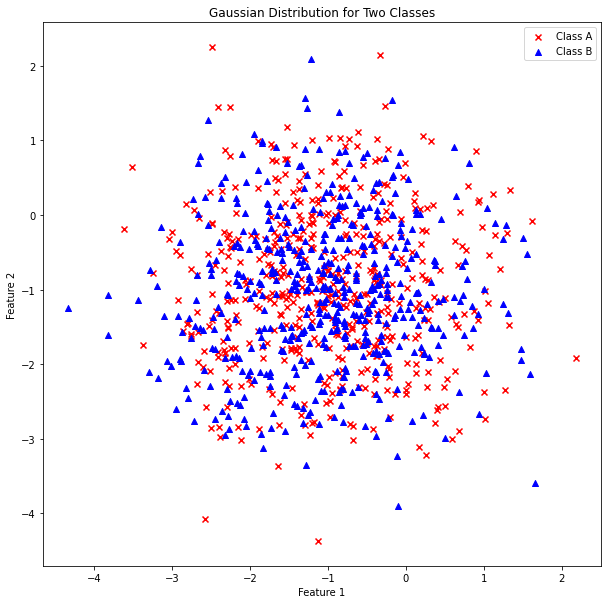

<Figure size 432x288 with 0 Axes>

In [68]:
std = 1
gaussian_n_data_points = 500
same_dist = create_gaussian_dist([-1, -1], std, 1000)
g_x_a = same_dist[:500]
g_y_a = [ 'A' for _ in range(gaussian_n_data_points)]
g_x_b = same_dist[500:]
g_y_b = [ 'B' for _ in range(gaussian_n_data_points)]

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = fig.subplots(1)

g_x0_a, g_x1_a = g_x_a.T
g_x0_b, g_x1_b = g_x_b.T

ax.scatter(g_x0_a, g_x1_a, color='red', marker='x')
ax.scatter(g_x0_b, g_x1_b, color='blue', marker='^')
ax.set(title='Gaussian Distribution for Two Classes', xlabel='Feature 1', ylabel='Feature 2')
ax.legend(['Class A', 'Class B'])

plt.show()
# plt.savefig('gaussian_dist_two_classes.png', bbox_inches='tight')
plt.clf()

In [70]:
# Create Perceptron for above distribution
gaussian_perceptron = Perceptron(verbose=2, random_state=0)
g_x = [*g_x_a, *g_x_b]
g_y = g_y_a + g_y_b

g_x_train, g_x_test, g_y_train, g_y_test = train_test_split(g_x, g_y)
gaussian_perceptron.fit(g_x_train, g_y_train)

-- Epoch 1
Norm: 0.97, NNZs: 2, Bias: 0.000000, T: 750, Avg. loss: 1.365905
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.35, NNZs: 2, Bias: 0.000000, T: 1500, Avg. loss: 1.325601
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.29, NNZs: 2, Bias: 2.000000, T: 2250, Avg. loss: 1.282241
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.46, NNZs: 2, Bias: -3.000000, T: 3000, Avg. loss: 1.247204
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.59, NNZs: 2, Bias: 1.000000, T: 3750, Avg. loss: 1.262588
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.34, NNZs: 2, Bias: -1.000000, T: 4500, Avg. loss: 1.250054
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.97, NNZs: 2, Bias: -1.000000, T: 5250, Avg. loss: 1.339395
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.50, NNZs: 2, Bias: -1.000000, T: 6000, Avg. loss: 1.230445
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.88, NNZs: 2, Bias: 0.000000, T: 6750, Avg. loss: 1.358252
Total training time: 0.0

Perceptron(verbose=2)

In [74]:
# Perceptron Information
print(f'Number of Epochs before Convergence: {gaussian_perceptron.n_iter_}')
gaussian_perc_train_accuracy = accuracy_score(gaussian_perceptron.predict(g_x_train), g_y_train)
gaussian_perc_test_accuracy = accuracy_score(gaussian_perceptron.predict(g_x_test), g_y_test)
print(f'Perceptron Accuracy on Training Data: {gaussian_perc_train_accuracy}')
print(f'Perceptron Accuracy on Test Data: {gaussian_perc_test_accuracy}')

Number of Epochs before Convergence: 13
Perceptron Accuracy on Training Data: 0.504
Perceptron Accuracy on Test Data: 0.488


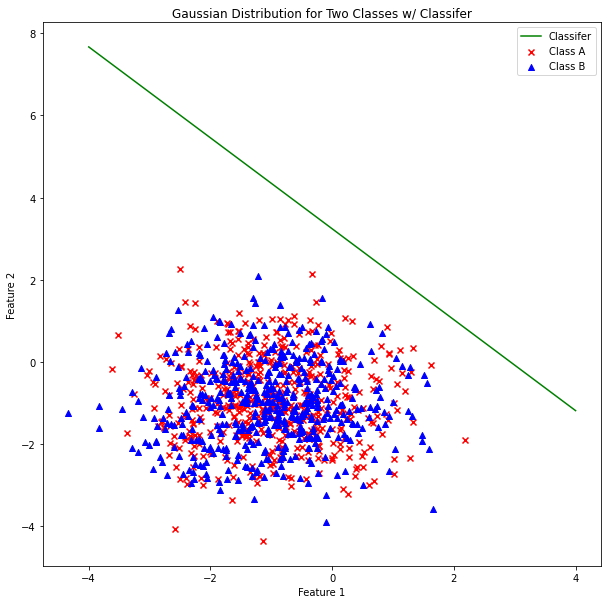

<Figure size 432x288 with 0 Axes>

In [72]:
g_x_line = np.linspace(-4, 4, 20)
w1, w2 = gaussian_perceptron.coef_[0]
bias = gaussian_perceptron.intercept_
g_y_line = (-w1 * g_x_line - bias) / w2

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = fig.subplots(1)

g_x0_a, g_x1_a = g_x_a.T
g_x0_b, g_x1_b = g_x_b.T

ax.scatter(g_x0_a, g_x1_a, color='red', marker='x')
ax.scatter(g_x0_b, g_x1_b, color='blue', marker='^')
ax.plot(g_x_line, g_y_line, color='green')
ax.set(title='Gaussian Distribution for Two Classes w/ Classifer', xlabel='Feature 1', ylabel='Feature 2')
ax.legend(['Classifer', 'Class A', 'Class B'])

plt.show()
plt.clf()

In [82]:
def run_gaussian_n_perceptron_test(train_size, n, verbose=0):
    """
    Uses uniform distribution for training a perceptron using train_size tests
    :param train_size: number of data points to train with
    :param n: total size of the data
    :param verbose: 0 for false, 1 for true
    :return: accuracy as percentage
    """

    split_val = int(n / 2)
    x_a = create_gaussian_dist([-1, -1], 1, split_val)
    y_a = [ 'A' for _ in range(split_val) ]
    x_b = create_gaussian_dist([1, 1], 1, split_val)
    y_b = [ 'B' for _ in range(split_val) ]

    X = [*x_a, *x_b]
    y = y_a + y_b

    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=train_size)

    p = Perceptron(random_state=0, verbose=verbose)
    p.fit(x_train, y_train)

    accuracy = accuracy_score(p.predict(x_test), y_test)
    if verbose == 1:
        print(f'Training Size: {train_size:5} :: Test Size: {len(x_test):5} :: Accuracy: {accuracy:.8f}')
    return accuracy, p.n_iter_

In [83]:
train_sizes_gaussian, scores_gaussian, epochs_gaussian = average_score_inc_n(run_gaussian_n_perceptron_test)

In [90]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(15)
axf, axe = fig.subplots(1, 2)

# Checking Percentage of total set by Accuracy (10,000 data points)
train_percentages_gaussian = [ x / 10000 for x in train_sizes_gaussian ]

axf.plot(train_sizes_gaussian, scores_gaussian)
axf.set(title='Average Accuracy per Input Vector Size', ylabel='Average Accuracy (decimal)', xlabel='Input Vector Size')
axf.xaxis.set(ticks=range(0, 10001, 1000))
axf.yaxis.set(ticks=np.arange(float(f'{min(scores_gaussian):.1f}') - .02, 1.0, .02))

axe.plot(train_sizes_gaussian, epochs_gaussian)
axe.set(title='Average Number of Epochs for Convergence per Input Vector Size', ylabel='Number of Epochs', xlabel='Input Vector Size')
axe.xaxis.set(ticks=range(0, 10001, 1000))

# plt.show()
plt.savefig('gaussian_dist_acc_and_epoch.png', bbox_inches='tight')
plt.clf()

<Figure size 1080x432 with 0 Axes>